In [1]:
%pylab inline
import math

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def sense(x):
    return x

def simulate(dt, x, u):
    #Euler method
    x += u * dt
    return x

def control_diagonal_line(t, y):
    return array([1., 1.])

def control_circle(t, y):
    return array([sin(t), cos(t)])

In [3]:
end_time = 2 * math.pi
dt = 0.01
time = linspace(0., end_time, int(end_time / dt) + 1)

x = array([-1., 0.])
x_t = [copy(x)]

for t in time:
    y = sense(x)
    u = control_circle(t, y)    
    x = simulate(dt, x, u)
    x_t.append(copy(x))

x_t = array(x_t)

Calculations:

$x(t) = \int_0^t (u(t) dt) + x(0)$

$x(t) = \int_0^t \begin{bmatrix}\sin(t) \\ \cos(t) \end{bmatrix} dt + x(0)$

$x(t) = \begin{bmatrix}\cos(t) -1 \\ -\sin(t) \end{bmatrix}$

Solving for t:

$\begin{bmatrix} -1 \\ 0 \end{bmatrix} = \begin{bmatrix}\cos(t) -1 \\ -\sin(t) \end{bmatrix}$

$t = \{ 2\pi n : n \in \mathbb{Z} \}$

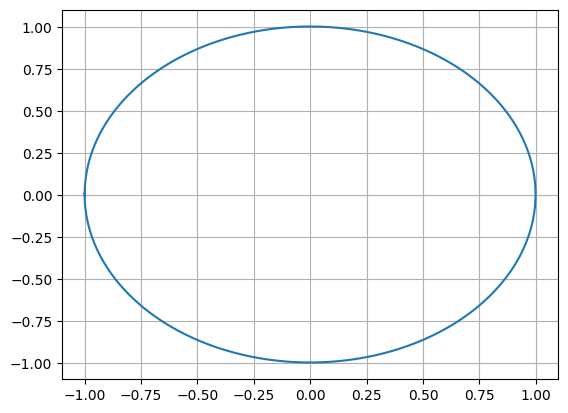

In [4]:
grid()
plot(x_t[:,0], x_t[:,1])

In [5]:
end_time = 3
dt = 0.01
time = linspace(0., end_time, int(end_time / dt) + 1)

x = array([0., 0.])
x_t = [copy(x)]

for t in time:
    y = sense(x)
    u = control_diagonal_line(t, y)    
    x = simulate(dt, x, u)
    x_t.append(copy(x))
x_t = array(x_t)

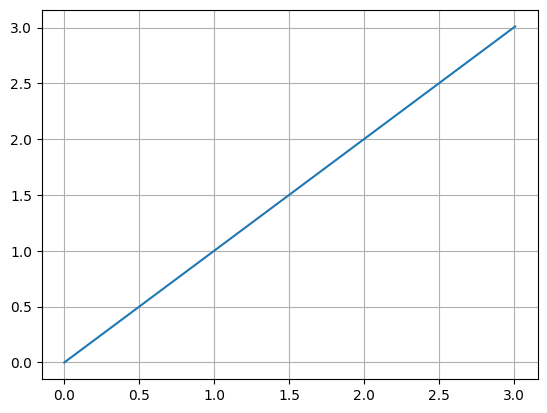

In [6]:
grid()
plot(x_t[:,0], x_t[:,1])

## Implementation of Simulator Class

In [7]:
class Simulator:
    
    def __init__(self, control, sense, solver):
        self.control = control
        self.sense = sense
        self.solver = solver
    
    def run(self, start_time = 0, end_time = 1, start_position=array([0., 0.]), dt = 1e-3):
        time = linspace(start_time, end_time, int(end_time / dt) + 1)

        x = copy(start_position)
        x_t = [copy(x)]

        for t in time:
            y = self.sense(x)
            u = self.control(t, y)
            x = self.solver(dt, x, u)
            x_t.append(copy(x))

        return array(x_t)
    
    def run_and_plot_2d(self, start_time = 0, end_time = 1, start_position=array([0., 0.]), dt = 1e-3):
        x_t = self.run(start_time, end_time, start_position, dt)
        grid()
        plot(x_t[:,0], x_t[:,1])
        if len(x_t) > 1:
            arrow(x_t[0, 0], x_t[0, 1], x_t[1, 0] - x_t[0, 0], x_t[1, 1] - x_t[0, 1], shape='full', lw=10, length_includes_head=True, head_width=.05, color='r')

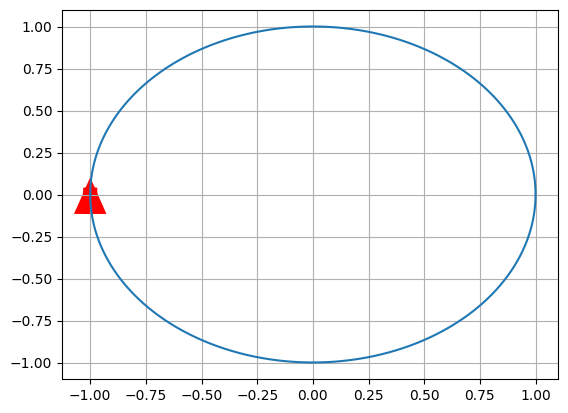

In [8]:
sim = Simulator(control_circle, sense, simulate)
sim.run_and_plot_2d(end_time=2*math.pi,start_position=array([-1., 0.]))

## Excercise 1

For a point robot in 2-D, find a control policy u to make the robot move in an ellipse shape.
The ellipse’s major axis is equal to 4m, and the minor axis is equal to 2m. The major axis
of the ellipse is aligned with the x-axis of the world frame. The center of the ellipse is in
the point $\begin{bmatrix}3 & 2\end{bmatrix}^T$

The image displayed shows a ellipse rotating counter clockwise.

Solution:

A parametric equation for an elipse centered at $(h,k)$ rotating counter clockwise $x = -a\sin(t) + h$, $y = b\cos(t) + k$, where $a$ is the major axis size and $b$ is the minor axis size.

Furthermore, we know that $a = 4$, $b = 2$, $h = 3$, $k = 2$.

$x(t) = \begin{bmatrix} -4 \sin(t) + 3 \\ 2 \cos(t) + 2 \end{bmatrix}$

$x(0) = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$

This means $u(t) = \frac{d}{dt} x(t) = \begin{bmatrix} -4\cos(t) \\ -2\sin(t) \end{bmatrix}$


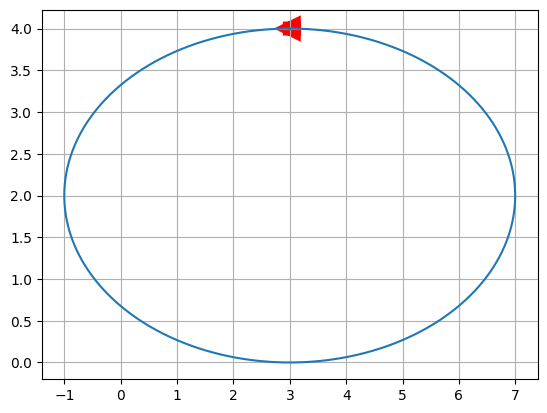

In [9]:
def control_ellipse(t, y):
    return array([-4*cos(t), -2*sin(t)])
    
sim = Simulator(control_ellipse, sense, simulate)

sim.run_and_plot_2d(end_time=2*math.pi,start_position=array([3., 4.]), dt=1e-3)

## Excercise 2

Rotate exercise 1 by 30 degrees.

Solution:

We had:

$x(t) = \begin{bmatrix} -4 \sin(t) \\ 2 \cos(t) \end{bmatrix} + x_0$

$x_0 = \begin{bmatrix} 3 \\ 2 \end{bmatrix}$

Using the rotation matrix $R = \begin{bmatrix} \cos(x) & -\sin(x) \\ \sin(x) & \cos(x) \end{bmatrix}$, we rotate counter clockwise by 30 degrees.

$\begin{bmatrix} \cos(30) & -\sin(30) \\ \sin(30) & \cos(30) \end{bmatrix} = \begin{bmatrix} \sqrt{3}/2 & -1/2 \\ 1/2 & \sqrt{3}/2 \end{bmatrix}$

Rotating about $x_0$ we get 

$\begin{bmatrix} \sqrt{3}/2 & -1/2 \\ 1/2 & \sqrt{3}/2 \end{bmatrix} \begin{bmatrix} -4 \sin(t) \\ 2 \cos(t) \end{bmatrix} + x_0$

$=\begin{bmatrix} \sqrt{3}/2 * -4 \sin(t) + -1/2 * 2 \cos(t) \\ 1/2 * -4 \sin(t) + \sqrt{3}/2 * 2 \cos(t) \end{bmatrix} + x_0$

$=\begin{bmatrix} -2\sqrt{3}\sin(t) - \cos(t) \\ -2 \sin(t) + \sqrt{3} \cos(t) \end{bmatrix} + x_0$

$=\begin{bmatrix} -2\sqrt{3}\sin(t) - \cos(t) + 3 \\ -2 \sin(t) + \sqrt{3} \cos(t) + 2 \end{bmatrix}$

$x(0) = \begin{bmatrix} 2 \\ \sqrt(3) + 2 \end{bmatrix}$

$u(t) = \frac{d}{dt} \begin{bmatrix} -2\sqrt{3}\sin(t) - \cos(t) + 3 \\ -2 \sin(t) + \sqrt{3} \cos(t) + 2 \end{bmatrix}$

$u(t) = \begin{bmatrix} -2\sqrt{3}\cos(t) + \sin(t) \\ -2 \cos(t) - \sqrt{3} \sin(t)\end{bmatrix}$

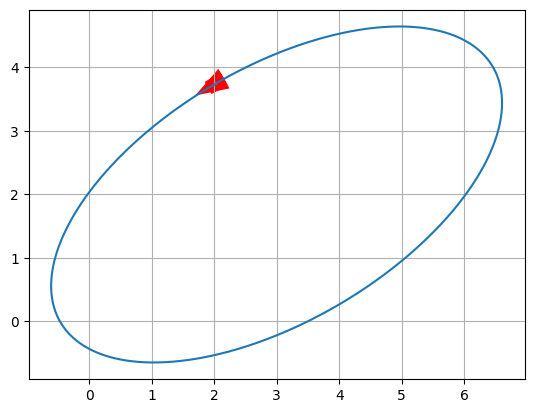

In [10]:
def control_ellipse_diag(t, y):
    return array([-2*sqrt(3) *cos(t) + sin(t), -2* cos(t) - sqrt(3) * sin(t)])
    
sim = Simulator(control_ellipse_diag, sense, simulate)

sim.run_and_plot_2d(end_time=2*math.pi,start_position=array([2.0, sqrt(3) + 2.]), dt=1e-3)